In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing 
from sklearn.decomposition import PCA

import seaborn as sns

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report, plot_confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
lol_df = pd.read_csv('high_diamond_ranked_10min.csv')

In [3]:
lol_df.head(10)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
5,4475365709,1,18,0,0,5,3,6,1,1,...,0,15201,7.0,18060,221,59,-698,-101,22.1,1520.1
6,4493010632,1,18,3,1,7,6,7,1,1,...,0,14463,6.4,15404,164,35,-2411,-1563,16.4,1446.3
7,4496759358,0,16,2,0,5,13,3,0,0,...,0,17920,6.6,16938,157,54,2615,800,15.7,1792.0
8,4443048030,0,16,3,0,7,7,8,0,0,...,0,18380,7.2,19298,240,53,1979,771,24.0,1838.0
9,4509433346,1,13,1,1,4,5,5,1,1,...,0,16605,6.8,18379,247,43,1548,1574,24.7,1660.5


In [4]:
len(lol_df)

9879

In [5]:
lol_df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

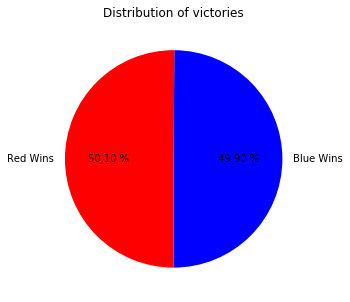

In [6]:
won_blue = lol_df.loc[lol_df.blueWins == 1].count()[0]
won_red = lol_df.loc[lol_df.blueWins != 1].count()[0]

plt.figure(figsize=(8,5))

labels = ['Blue Wins', 'Red Wins']
colors = ['blue', 'red']

plt.pie([won_blue, won_red], labels = labels, colors=colors, autopct='%.2f %%',startangle=-90)

plt.title('Distribution of victories')

plt.show()

In [7]:
lol_df[['blueWins','blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled']].head(20)

,blueWins,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled
0,0,0,17210,6.6,17039,195
1,0,0,14712,6.6,16265,174
2,0,0,16113,6.4,16221,186
3,0,0,15157,7.0,17954,201
4,0,0,16400,7.0,18543,210
5,1,0,15899,7.0,18161,225
6,1,0,16874,6.8,16967,225
7,0,0,15305,6.4,16138,209
8,0,0,16401,7.2,18527,189
9,1,0,15057,6.8,16805,220


In [8]:
lol_df[['blueTowersDestroyed','redTowersDestroyed']].describe(percentiles = [0.25,0.5,0.75,0.9,0.98] )

,blueTowersDestroyed,redTowersDestroyed
count,9879.000000,9879.000000
mean,0.051422,0.043021
std,0.244369,0.216900
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
90%,0.000000,0.000000
98%,1.000000,1.000000
max,4.000000,2.000000


In [9]:
lol_df.loc[(lol_df['blueTowersDestroyed']==1) &(lol_df['blueWins']==1)].count()[0]

316

In [10]:
blue_towers = lol_df.loc[lol_df['blueTowersDestroyed'] >=1].count()[0]
blue_victories_tower = lol_df.loc[(lol_df['blueTowersDestroyed']==1) &(lol_df['blueWins']==1)].count()[0]
red_towers = lol_df.loc[lol_df['redTowersDestroyed']>=1].count()[0]
red_victories_tower = lol_df.loc[(lol_df['redTowersDestroyed']>=1) &(lol_df['blueWins']==0)].count()[0]


<Figure size 576x360 with 0 Axes>

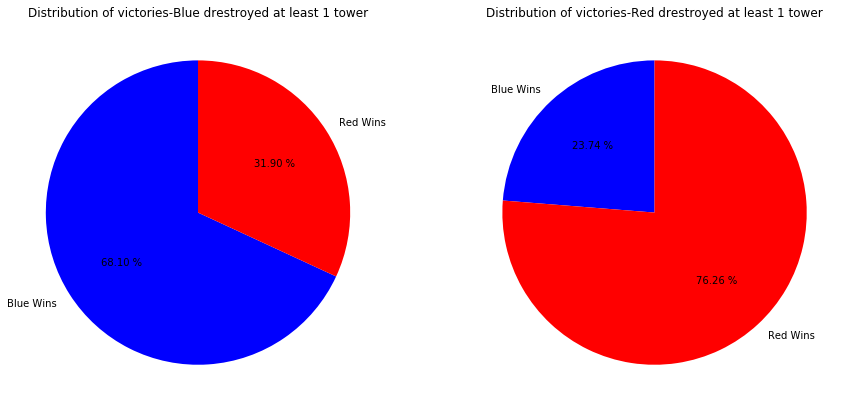

In [11]:
plt.figure(figsize=(8,5))

labels = ['Blue Wins', 'Red Wins']
colors = ['blue', 'red']

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.pie([blue_victories_tower, blue_towers-blue_victories_tower], labels = labels, colors=colors, autopct='%.2f %%',startangle=90)
ax1.set_title('Distribution of victories-Blue drestroyed at least 1 tower')

ax2.pie([red_towers-red_victories_tower,red_victories_tower], labels = labels, colors=colors, autopct='%.2f %%',startangle=90)
ax2.set_title('Distribution of victories-Red drestroyed at least 1 tower')

plt.show()

In [12]:
tower=lol_df.loc[lol_df['blueTowersDestroyed'] >=1].count()[0]+lol_df.loc[lol_df['redTowersDestroyed'] >=1].count()[0]
tot = len(lol_df)

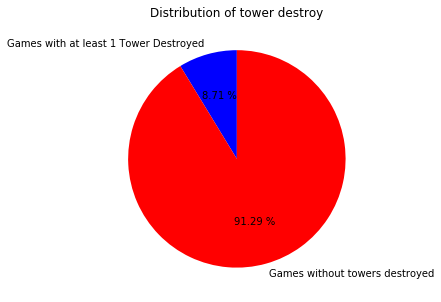

In [13]:
plt.figure(figsize=(8,5))

labels = ['Games with at least 1 Tower Destroyed', 'Games without towers destroyed']
colors = ['blue', 'red']

plt.pie([tower, tot-tower], labels = labels, colors=colors, autopct='%.2f %%',startangle=90)
plt.title('Distribution of tower destroy')


plt.show()

# Classifier

In [14]:
y = lol_df['blueWins']
x = lol_df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'redWardsPlaced', 'redWardsDestroyed',
        'redKills','redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]

## Separate data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Scale data

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Fit: Logistic Regression

In [17]:
clr = LogisticRegression(C=0.4,penalty='l2',tol=1e-5,solver='newton-cg',dual=False,random_state=42,max_iter=100)
clr.fit(X_train,y_train)

LogisticRegression(C=0.4, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='newton-cg', tol=1e-05, verbose=0,
                   warm_start=False)

0.7300944669365722
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1480
           1       0.73      0.72      0.73      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

0.734056399132321
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3469
           1       0.73      0.73      0.73      3446

    accuracy                           0.73      6915
   macro avg       0.73      0.73      0.73      6915
weighted avg       0.73      0.73      0.73      6915



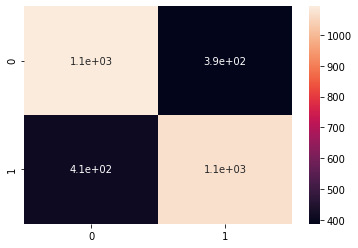

In [42]:
predictions = clr.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)
predictions_clr_train = clr.predict(X_train)
print(accuracy_score(y_train,predictions_clr_train))
print(classification_report(y_train,predictions_clr_train))

## Fit: RandomForest

In [40]:
crf = RandomForestClassifier(n_estimators=500,random_state=42)
crf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

0.7290823211875843
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1480
           1       0.74      0.72      0.73      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3469
           1       1.00      1.00      1.00      3446

    accuracy                           1.00      6915
   macro avg       1.00      1.00      1.00      6915
weighted avg       1.00      1.00      1.00      6915



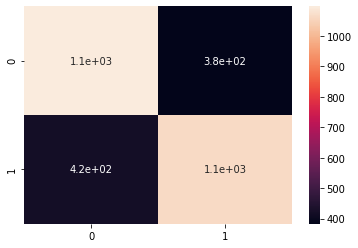

In [41]:
predictions_crf = crf.predict(X_test)
print(accuracy_score(y_test,predictions_crf))
print(classification_report(y_test,predictions_crf))
sns.heatmap(confusion_matrix(y_test,predictions_crf), annot=True)
predictions_crf_train = crf.predict(X_train)
print(accuracy_score(y_train,predictions_crf_train))
print(classification_report(y_train,predictions_crf_train))

## Fit: GradientBoosting

In [33]:
cgb = GradientBoostingClassifier(n_estimators=100,random_state=42,learning_rate=0.05)
cgb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

0.7257085020242915
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1480
           1       0.73      0.72      0.72      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

0.7482284887924802
              precision    recall  f1-score   support

           0       0.75      0.75      0.75      3469
           1       0.75      0.74      0.75      3446

    accuracy                           0.75      6915
   macro avg       0.75      0.75      0.75      6915
weighted avg       0.75      0.75      0.75      6915



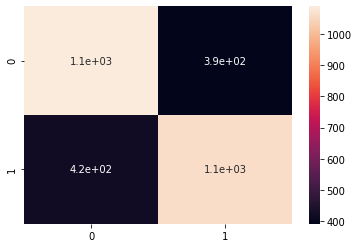

In [34]:
predictions_cgb = cgb.predict(X_test)
print(accuracy_score(y_test,predictions_cgb))
print(classification_report(y_test,predictions_cgb))
sns.heatmap(confusion_matrix(y_test,predictions_cgb),annot=True)
predictions_cgb_train = cgb.predict(X_train)
print(accuracy_score(y_train,predictions_cgb_train))
print(classification_report(y_train,predictions_cgb_train))

## Correlation

In [23]:
print(lol_df.corr().abs()['blueWins'].sort_values(ascending=False))

blueWins                        1.000000
redGoldDiff                     0.511119
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
redExperienceDiff               0.489558
blueGoldPerMin                  0.417213
blueTotalGold                   0.417213
redGoldPerMin                   0.411396
redTotalGold                    0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
blueDeaths                      0.339297
redKills                        0.339297
redDeaths                       0.337358
blueKills                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueTotalMinionsKilled          0.224909
blueCSPerMin                    0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redCSPerMin     

In [24]:
columns = ['blueWins','blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'redWardsPlaced', 'redWardsDestroyed',
        'redKills','redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']
lol_df[columns].corr().abs()['blueWins'].sort_values(ascending=False)

blueWins                        1.000000
blueGoldDiff                    0.511119
blueExperienceDiff              0.489558
blueTotalGold                   0.417213
redTotalGold                    0.411396
blueTotalExperience             0.396141
redTotalExperience              0.387588
blueAvgLevel                    0.357820
redAvgLevel                     0.352127
redKills                        0.339297
blueKills                       0.337358
blueAssists                     0.276685
redAssists                      0.271047
blueTotalMinionsKilled          0.224909
blueEliteMonsters               0.221944
redEliteMonsters                0.221551
blueDragons                     0.213768
redTotalMinionsKilled           0.212171
redDragons                      0.209516
blueFirstBlood                  0.201769
blueTotalJungleMinionsKilled    0.131445
blueTowersDestroyed             0.115566
redTotalJungleMinionsKilled     0.110994
redTowersDestroyed              0.103696
redHeralds      

## Random Seach

In [55]:
# n_estimator = [int(x) for x in np.linspace(100,1000,10)]
# criterion = ['gini','entropy']
# min_sample_split = [int(x) for x in np.linspace(2,20,10)]
# max_features = ['auto','log2']
# min_sample_leaf = [1,2,4]
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)

# random_grid = {'n_estimators':n_estimator,
#               'criterion':criterion,
#               'min_samples_split':min_sample_split,
#               'max_features':max_features,
#               'min_samples_leaf':min_sample_leaf,
#               'max_depth':max_depth }

# rf = RandomForestClassifier()
# cvrf = RandomizedSearchCV(rf,random_grid,n_iter=250,n_jobs=-1,cv=6,verbose=2,random_state=42)
# search = cvrf.fit(X_train,y_train)

Fitting 6 folds for each of 250 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   30.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed: 10.3min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 17.7min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 25.9min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 27.1min finished


In [56]:
search.best_params_

{'n_estimators': 300,
 'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'criterion': 'entropy'}

0.7240215924426451
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1480
           1       0.73      0.71      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964

0.8909616775126536
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      3469
           1       0.89      0.89      0.89      3446

    accuracy                           0.89      6915
   macro avg       0.89      0.89      0.89      6915
weighted avg       0.89      0.89      0.89      6915



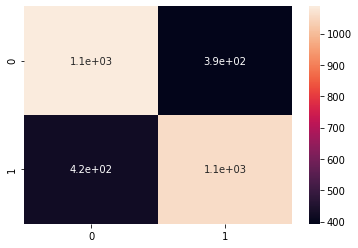

In [60]:
# crf = RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=80,min_samples_split=16,min_samples_leaf=4,max_features='log2',random_state=42)
# #crf = RandomForestClassifier(n_estimators=300)
# crf.fit(X_train,y_train)
# predictions_crf = crf.predict(X_test)
# print(accuracy_score(y_test,predictions_crf))
# print(classification_report(y_test,predictions_crf))
# sns.heatmap(confusion_matrix(y_test,predictions_crf), annot=True)
# predictions_crf_train = crf.predict(X_train)
# print(accuracy_score(y_train,predictions_crf_train))
# print(classification_report(y_train,predictions_crf_train))

In [64]:
C = [x for x in np.linspace(0.1,10,10)]
tol = [1e-4,1e-3,1e-5,5e-4,5e-5]
solver = ['newton-cg', 'lbfgs','sag', 'saga']
max_iter = [int(x) for x in np.linspace(100,1000,10)]

random_grid = {'C':C,
              'tol':tol,
              'solver':solver,
              'max_iter':max_iter}

clr = LogisticRegression()
cvrf = RandomizedSearchCV(clr,random_grid,n_iter=250,n_jobs=-1,cv=10,verbose=2,random_state=42)
search = cvrf.fit(X_train,y_train)



Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:    8.8s
[Parallel(n_jobs=-1)]: Done 1248 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1978 tasks      | elapsed:   27.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   35.1s finished


In [66]:
cvrf.best_params_

{'tol': 0.0001, 'solver': 'lbfgs', 'max_iter': 400, 'C': 0.1}

0.7294197031039136
              precision    recall  f1-score   support

           0       0.73      0.74      0.73      1480
           1       0.73      0.72      0.73      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964

0.7347794649313087
              precision    recall  f1-score   support

           0       0.73      0.74      0.74      3469
           1       0.73      0.73      0.73      3446

    accuracy                           0.73      6915
   macro avg       0.73      0.73      0.73      6915
weighted avg       0.73      0.73      0.73      6915



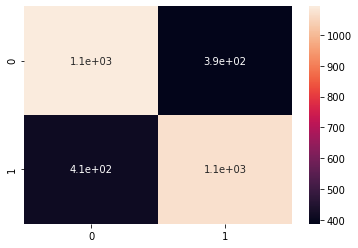

In [74]:
clr = LogisticRegression(C=0.1,penalty='l2',tol=1e-6,solver='lbfgs',random_state=42,max_iter=400)
clr.fit(X_train,y_train)
predictions = clr.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True)
predictions_clr_train = clr.predict(X_train)
print(accuracy_score(y_train,predictions_clr_train))
print(classification_report(y_train,predictions_clr_train))

# Regression

In [102]:
X = lol_df[['blueAssists','blueTotalGold','blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueAvgLevel',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed' ,'blueWardsPlaced' ,
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
        'redWardsPlaced', 'redWardsDestroyed',
        'redKills','redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled']]

y = lol_df['blueTotalGold']

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 42)

In [104]:
lm = LinearRegression()
lm.fit(X_train,y_train)
predict_lm = lm.predict(X_test)
print('MSE: ', mean_squared_error(y_test,predict_lm))
print('R2: ',r2_score(y_test,predict_lm))
print('Coeficientes: ',lm.coef_)

MSE:  3.754127395432972e-24
R2:  1.0
Coeficientes:  2.1827872842550278e-11


In [97]:
rfr = RandomForestRegressor(n_estimators=200)
rfr.fit(X_train,y_train)
predict_rfr = rfr.predict(X_test)
print('MSE: ', mean_squared_error(y_test,predict_rfr))
print('R2: ',r2_score(y_test,predict_rfr))

MSE:  0.0008416877530364386
R2:  0.999947352416391


## Re: analysis

In [4]:
lol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

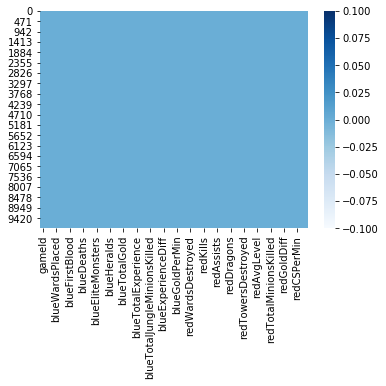

In [5]:
sns.heatmap(lol_df.isnull(),cmap='Blues') #Checking the null values in a visual way

### Separating the data

In [6]:
blue_data = []
red_data = []
for col in list(lol_df):
    if col[0]=='r':
        red_data.append(col)
    elif col[0] =='b':
        blue_data.append(col)

blue = lol_df[blue_data]
red_data = ['blueWins']+red_data
red = lol_df[red_data]

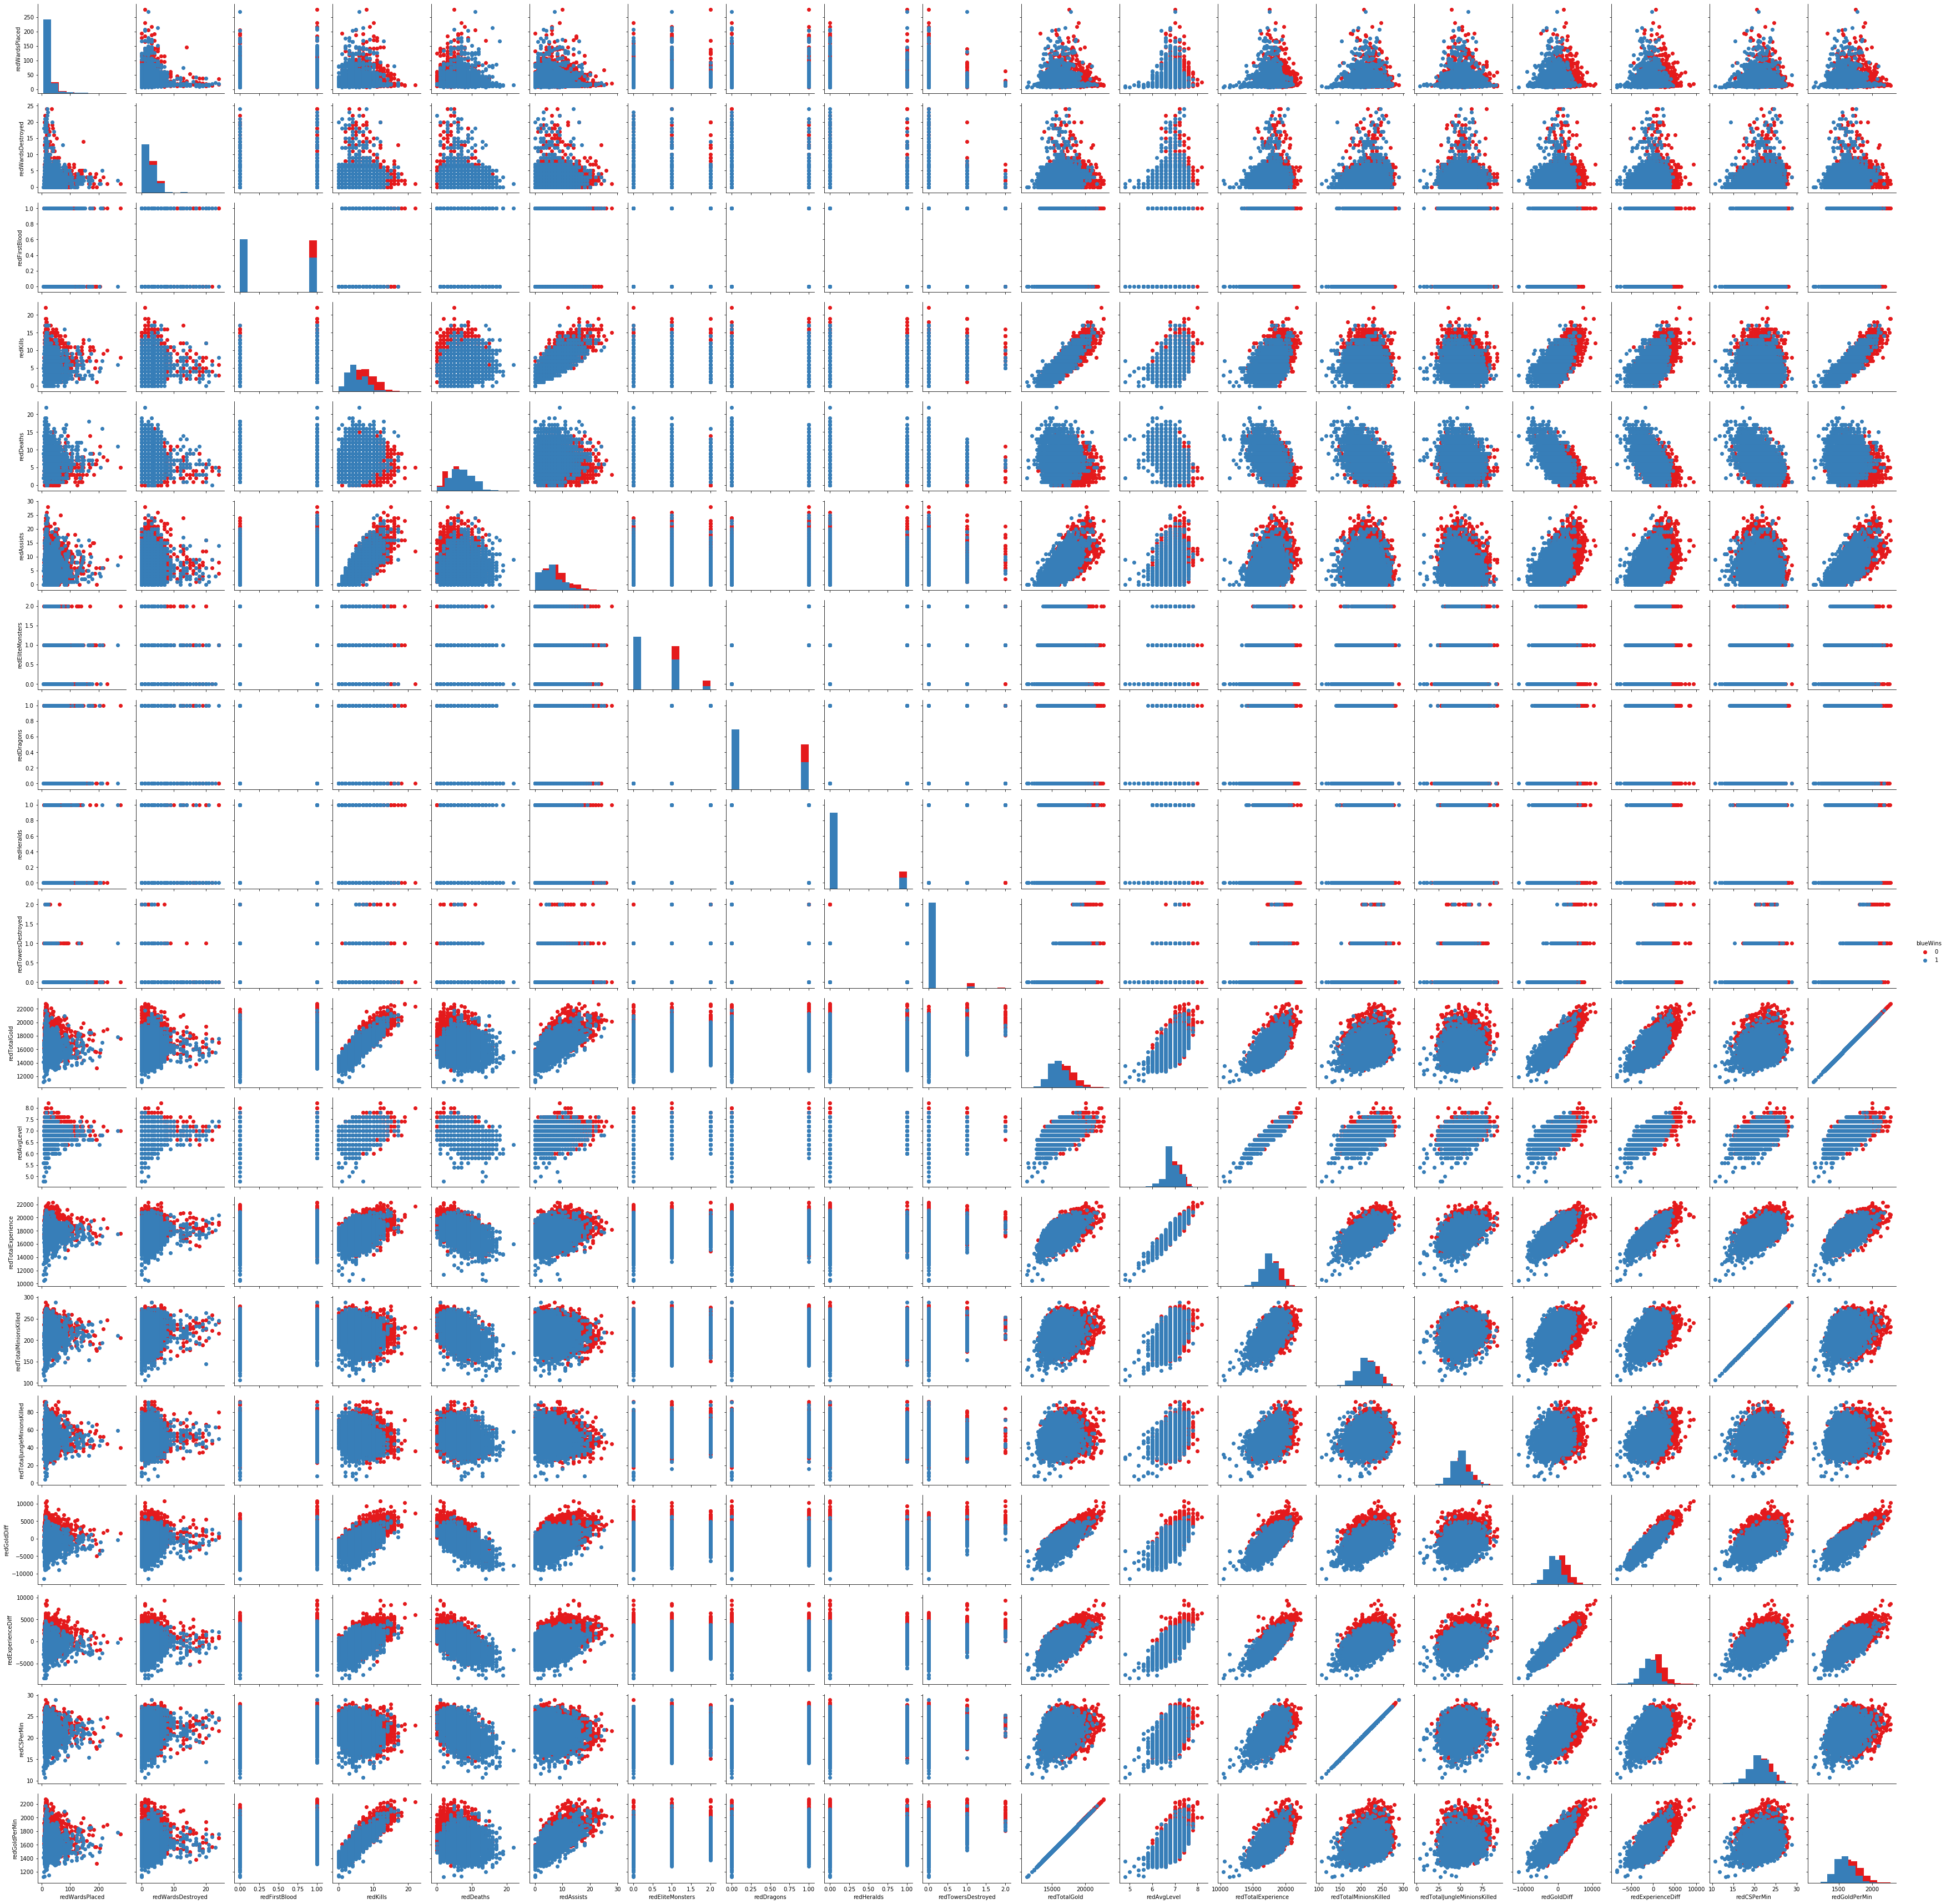

In [19]:
g=sns.PairGrid(data=red,hue='blueWins',palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend()

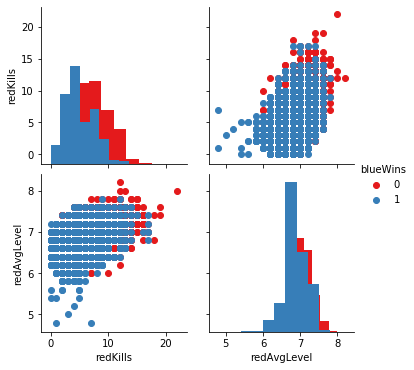

In [7]:
g=sns.PairGrid(data=red[['redKills','redAvgLevel','blueWins']],hue='blueWins',palette='Set1')
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
g.add_legend();

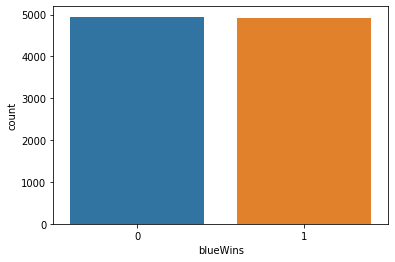

In [8]:
sns.countplot(blue['blueWins']);

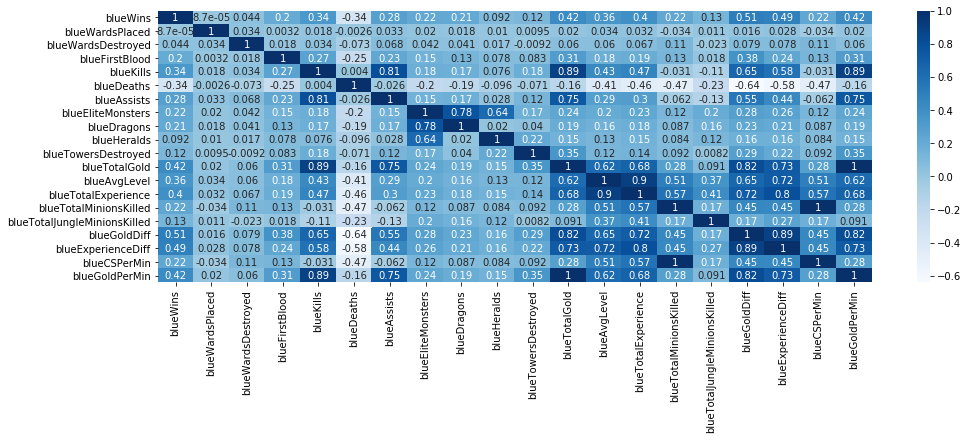

In [9]:
plt.figure(figsize=(16,5))
sns.heatmap(data=blue.corr(), annot=True, cmap='Blues');

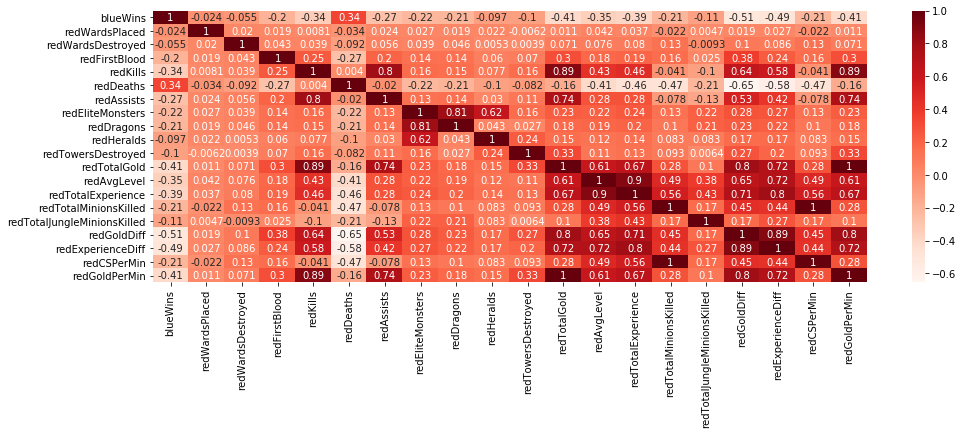

In [10]:
plt.figure(figsize=(16,5))
sns.heatmap(data=red.corr(), annot=True, cmap='Reds');

In [11]:
correlations = blue.corr().abs()['blueWins']
cols_blue = []
for c in correlations.index:
    if correlations[c] > 0.2:
        cols_blue.append(c)
# cols_blue = ['blueWins'] + cols_blue
correlations = red.corr().abs()['blueWins']
cols_red = []
for c in correlations.index:
    if correlations[c] > 0.2:
        cols_red.append(c)
# cols_red = ['blueWins'] + cols_red

In [12]:
blue = blue[cols_blue]
red = red[cols_red]

In [13]:
blue.drop(['blueGoldPerMin','blueCSPerMin'],axis=1,inplace=True)
blue.columns


Index(['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled', 'blueGoldDiff',
       'blueExperienceDiff'],
      dtype='object')

In [14]:
red.drop(['redGoldPerMin','redCSPerMin'],axis=1,inplace=True)
red.columns

Index(['blueWins', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redTotalGold', 'redAvgLevel',
       'redTotalExperience', 'redTotalMinionsKilled', 'redGoldDiff',
       'redExperienceDiff'],
      dtype='object')

### Classification

In [15]:
X = blue[blue.columns[1:]]
y = blue['blueWins']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42 )
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
rf = RandomForestClassifier(n_estimators=100,random_state=42,min_samples_split=4)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

0.9973969631236442
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3469
           1       1.00      1.00      1.00      3446

    accuracy                           1.00      6915
   macro avg       1.00      1.00      1.00      6915
weighted avg       1.00      1.00      1.00      6915

0.7226720647773279
              precision    recall  f1-score   support

           0       0.72      0.73      0.72      1480
           1       0.73      0.72      0.72      1484

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



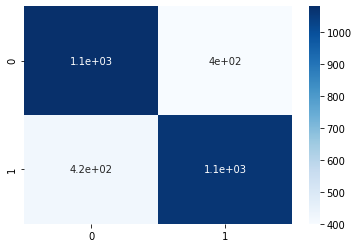

In [17]:
predictions_rf = rf.predict(X_test)
print(accuracy_score(y_train,rf.predict(X_train)))
print(classification_report(y_train,rf.predict(X_train)))
print(accuracy_score(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))
sns.heatmap(confusion_matrix(y_test,predictions_rf),annot= True,cmap='Blues');

In [18]:
n_estimator = [int(x) for x in np.linspace(100,1000,10)]
criterion = ['gini','entropy']
min_sample_split = [int(x) for x in np.linspace(2,20,10)]
max_features = ['auto','log2']
min_sample_leaf = [1,2,4]
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

random_grid = {'n_estimators':n_estimator,
              'criterion':criterion,
              'min_samples_split':min_sample_split,
              'max_features':max_features,
              'min_samples_leaf':min_sample_leaf,
              'max_depth':max_depth }

rf = RandomForestClassifier()
cvrf = RandomizedSearchCV(rf,random_grid,n_iter=300,n_jobs=-1,cv=6,verbose=2,random_state=42)
search = cvrf.fit(X_train,y_train)

Fitting 6 folds for each of 300 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed: 15.0min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed: 28.5min finished


[0.00975327 0.03557662 0.06011933 0.03401928 0.01665118 0.01391771
 0.13413442 0.03539932 0.10428185 0.04599577 0.3002957  0.20985554]
0.8054953000723066
              precision    recall  f1-score   support

           0       0.80      0.81      0.81      3469
           1       0.81      0.80      0.80      3446

    accuracy                           0.81      6915
   macro avg       0.81      0.81      0.81      6915
weighted avg       0.81      0.81      0.81      6915

0.7257085020242915
              precision    recall  f1-score   support

           0       0.72      0.73      0.73      1480
           1       0.73      0.72      0.72      1484

    accuracy                           0.73      2964
   macro avg       0.73      0.73      0.73      2964
weighted avg       0.73      0.73      0.73      2964



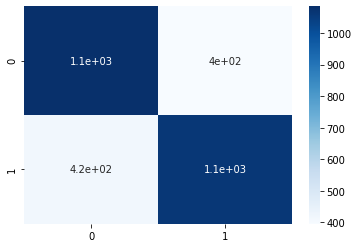

In [45]:
search.best_params_
rf = RandomForestClassifier(n_estimators=300,min_samples_split=20,min_samples_leaf=1,max_depth=10,random_state=42)
rf.fit(X_train,y_train)

predictions_rf = rf.predict(X_test)
print(accuracy_score(y_train,rf.predict(X_train)))
print(classification_report(y_train,rf.predict(X_train)))
print(accuracy_score(y_test,predictions_rf))
print(classification_report(y_test,predictions_rf))
sns.heatmap(confusion_matrix(y_test,predictions_rf),annot= True,cmap='Blues');

In [30]:
C = [x for x in np.linspace(0.1,10,10)]
tol = [1e-4,1e-3,1e-5,5e-4,5e-5]
solver = ['newton-cg', 'lbfgs','sag', 'saga']
max_iter = [int(x) for x in np.linspace(100,1000,10)]

random_grid = {'C':C,
              'tol':tol,
              'solver':solver,
              'max_iter':max_iter}

clr = LogisticRegression()
cvrf = RandomizedSearchCV(clr,random_grid,n_iter=350,n_jobs=-1,cv=6,verbose=2,random_state=42)
search = cvrf.fit(X_train,y_train)

Fitting 6 folds for each of 350 candidates, totalling 2100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done 1220 tasks      | elapsed:    9.0s
[Parallel(n_jobs=-1)]: Done 2100 out of 2100 | elapsed:   14.3s finished


In [33]:
cvrf.best_params_

{'tol': 0.0005, 'solver': 'saga', 'max_iter': 400, 'C': 0.1}

In [42]:
clr = LogisticRegression(C=0.1,tol=0.0005,solver='saga',max_iter=400,random_state=42)
clr.fit(X_train,y_train)
predictions = clr.predict(X_test)
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))
sns.heatmap(confusion_matrix(y_test,predictions), annot=True,cmap='Blues')
predictions_clr_train = clr.predict(X_train)
print(accuracy_score(y_train,predictions_clr_train))
print(classification_report(y_train,predictions_clr_train))

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'

# PCA analysis

In [1]:
x_sc=StandardScaler().fit_transform(X)
pca=PCA(n_components=2)
components=pca.fit_transform(x_sc)
plt.figure(figsize=(10,8))
plt.scatter(components[:,0],components[:,1],c=y,cmap='plasma')
plt.xlabel('First Principal Comp')
plt.ylabel('Second Principal COmp')

NameError: name 'StandardScaler' is not defined